In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import pickle
from struct import *
import pandas as pd
import seaborn as sns
import mixture
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
import collections
from math import pi, cos, sin, cosh, tanh
from scipy.spatial.transform import Rotation as Rot
import cv2
import plotting
from plotting import *
import interpolation
from interpolation import *
import ficks
from ficks import *
import structure
from structure import *
import scipy.interpolate
import scipy.integrate
import scipy.stats
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor, LinearRegression
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.signal import argrelextrema
from statistics import median

In [2]:
#
# Define colors and states for plotting events.
#
STATES = ['fix', 'sac', 'smp', 'vor', 'blink', 'fix_blink', 'sac_blink', 'other', 'loss']
COLORS = {'fix':'red', 'sac':'lime', 'smp':'purple', 'vor':'brown', 'blink':'dodgerblue', 'fix_blink':'darkorchid', 'sac_blink':'turquoise', 'other':'grey', 'loss':'gold'}
BORDERS = {'fix':'magenta', 'sac':'green', 'smp':'blue', 'vor':'tan', 'blink':'royalblue', 'fix_blink':'darkviolet', 'sac_blink':'lightseagreen', 'other':'black', 'loss':'yellow'}
BINS = 50

## Load data

In [3]:
# merge varjo results so far
in_path = '/data/Isabella/thesis_spring2022/event_detect_out/'
out_path = '/data/Isabella/thesis_spring2022/event_detect_out/archive/for_fiona/'

# for fname in os.listdir(in_path):
#     if fname == 'archive':
#         continue
#     i = 0
#     if '50' not in fname and '51' not in fname:
#         if i == 0:
#             seq = pd.read_csv(in_path+fname)
#             i += 1
#         else:
#             seq = pd.concat([seq, pd.read_csv(in_path+fname)])
#     seq.to_csv(out_path+'/for_fiona_varjo_samples_7-7-22.csv')

seq = pd.read_csv(out_path+'for_fiona_varjo_samples_7-7-22.csv')

## Analysis

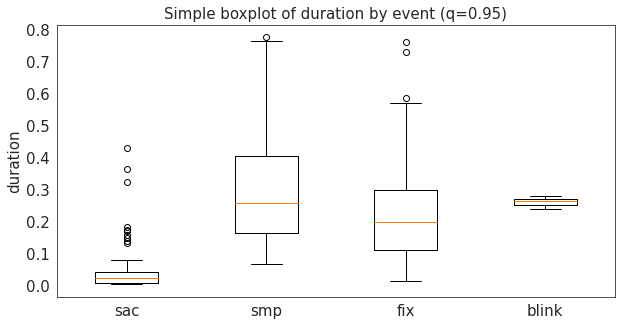

In [4]:
feature_boxplot_by_event(seq, 'duration', q=0.95)

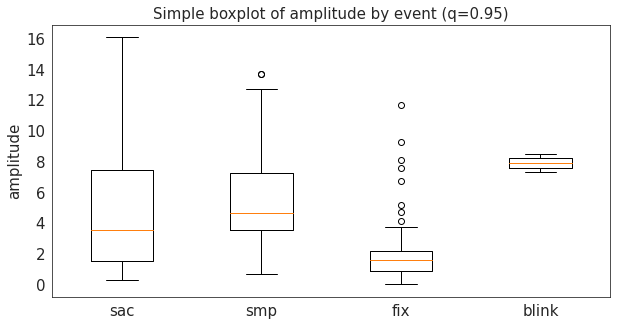

In [5]:
feature_boxplot_by_event(seq, 'amplitude', q=0.95)

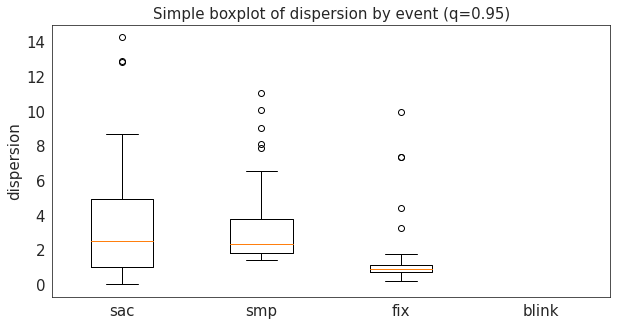

In [6]:
feature_boxplot_by_event(seq, 'dispersion', q=0.95)

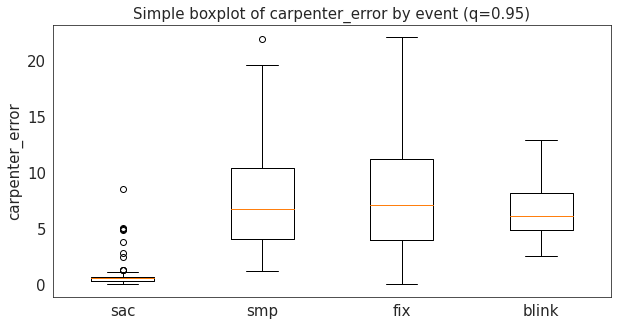

In [7]:
feature_boxplot_by_event(seq, 'carpenter_error', q=0.95)

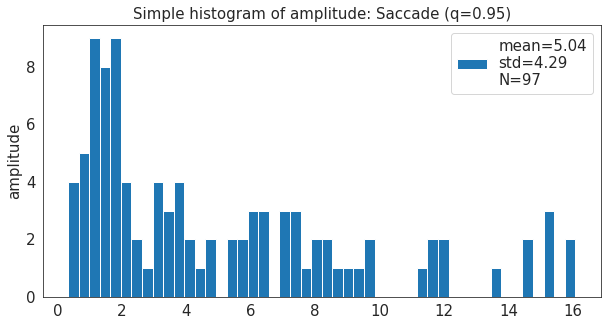

In [8]:
feature_histogram(seq, feat='amplitude', event='sac', q=0.95)

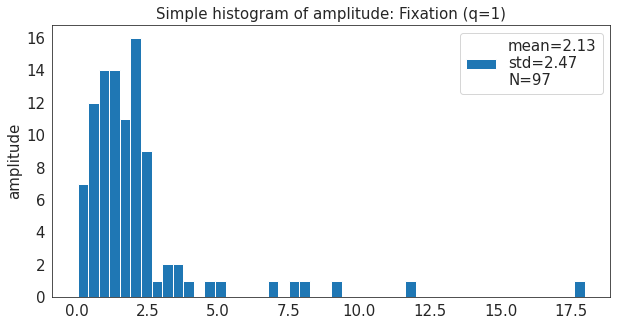

In [9]:
feature_histogram(seq, feat='amplitude', event='fix')

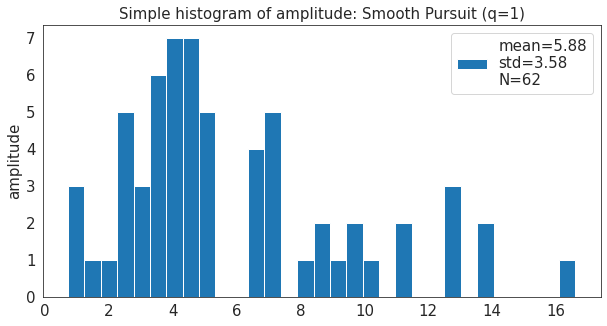

In [10]:
feature_histogram(seq, feat='amplitude', event='smp')

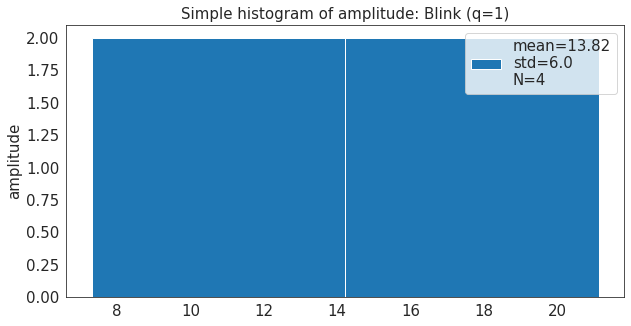

In [11]:
feature_histogram(seq, feat='amplitude', event='blink')

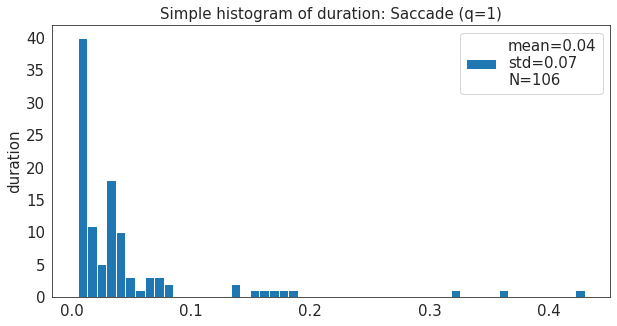

In [12]:
feature_histogram(seq, feat='duration', event='sac')

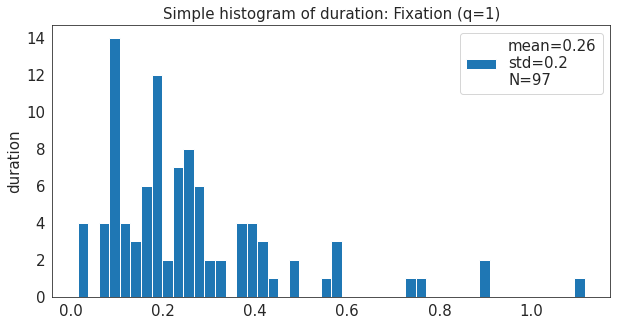

In [13]:
feature_histogram(seq, feat='duration', event='fix')

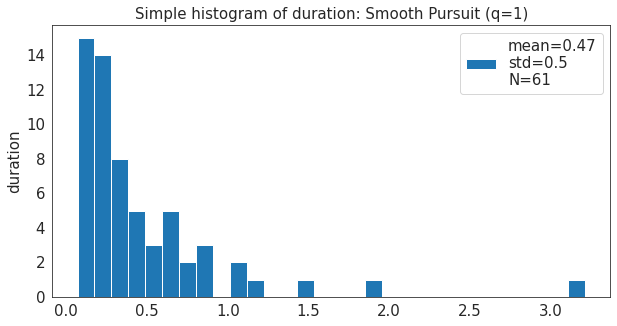

In [14]:
feature_histogram(seq, feat='duration', event='smp')

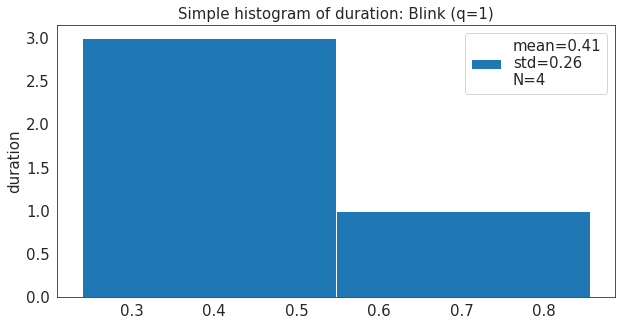

In [15]:
feature_histogram(seq, feat='duration', event='blink')

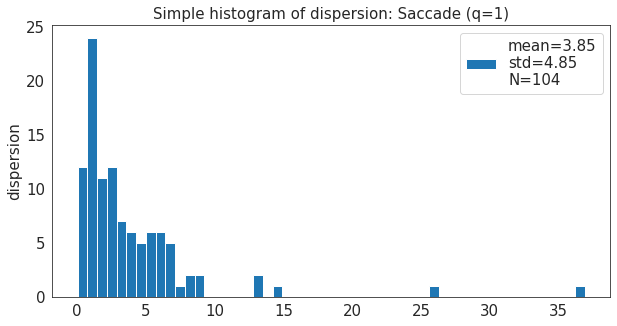

In [16]:
feature_histogram(seq, feat='dispersion', event='sac')

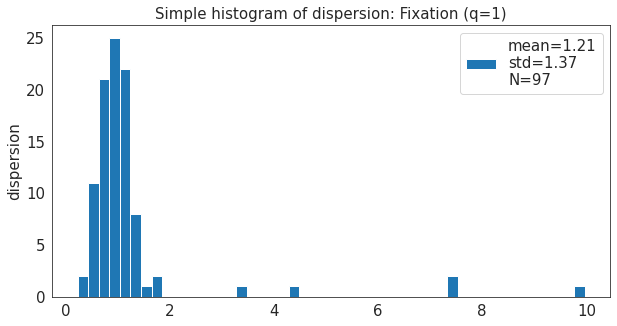

In [17]:
feature_histogram(seq, feat='dispersion', event='fix')

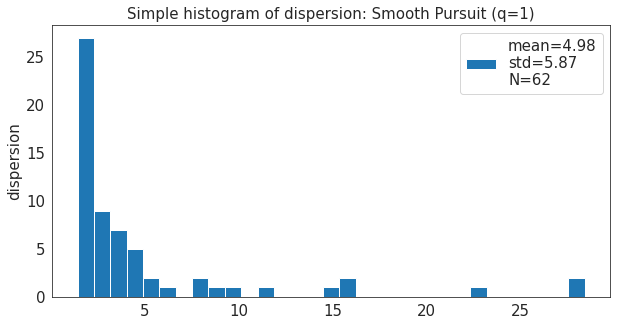

In [18]:
feature_histogram(seq, feat='dispersion', event='smp')

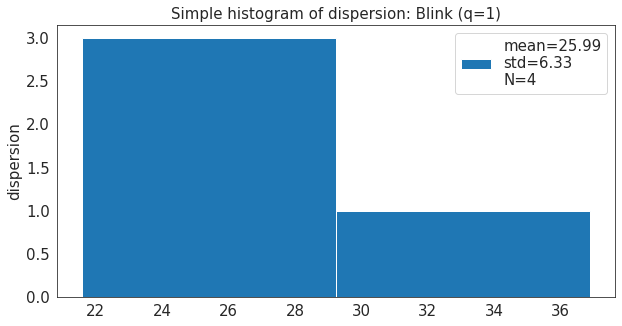

In [19]:
feature_histogram(seq, feat='dispersion', event='blink')

In [20]:
# Here, vel is the Dn, upsampled to 500Hz, where
# Dn is the derivative of the interpolated positional features at time t: Dn = sqrt(x'(t)^2+y'(t)^2)

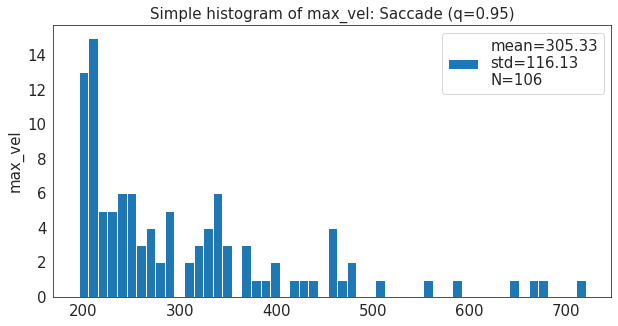

In [21]:
feature_histogram(seq, feat='max_vel', event='sac',q=0.95)

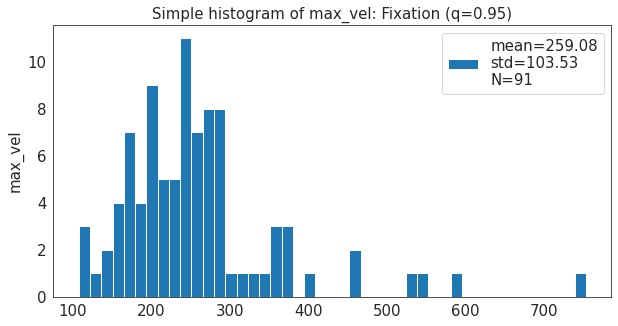

In [22]:
feature_histogram(seq, feat='max_vel', event='fix',q=.95)

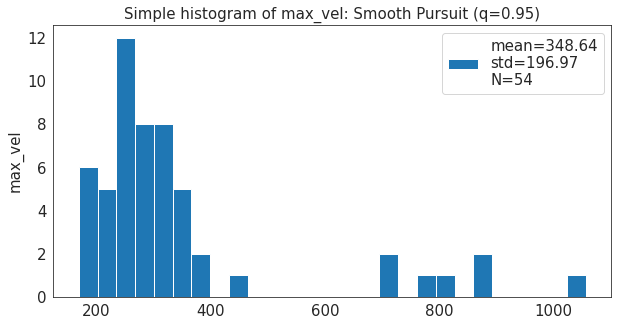

In [23]:
feature_histogram(seq, feat='max_vel', event='smp',q=0.95)

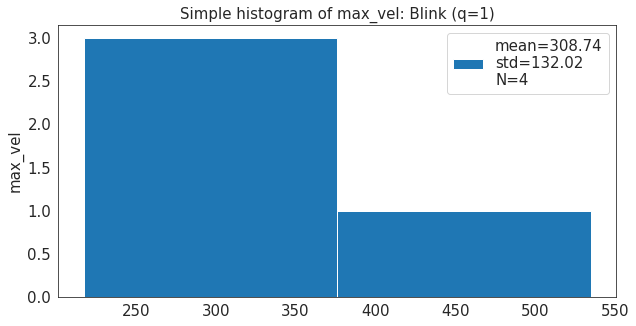

In [24]:
feature_histogram(seq, feat='max_vel', event='blink')

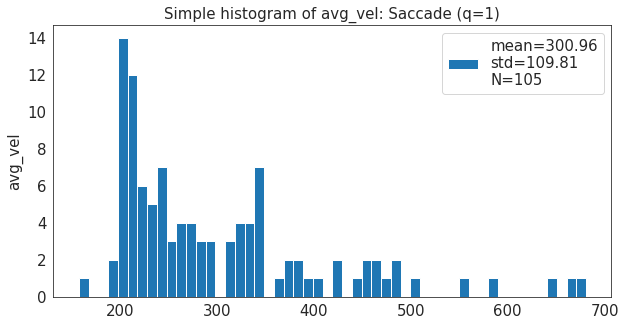

In [25]:
feature_histogram(seq, feat='avg_vel', event='sac')

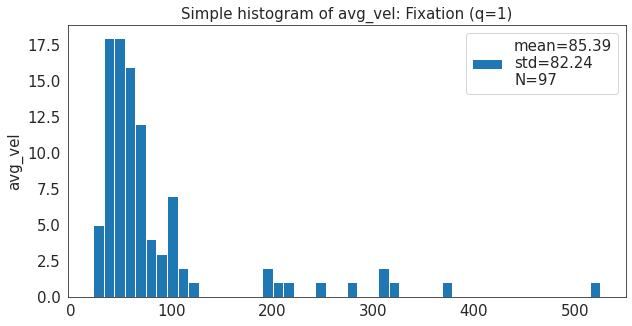

In [26]:
feature_histogram(seq, feat='avg_vel', event='fix')

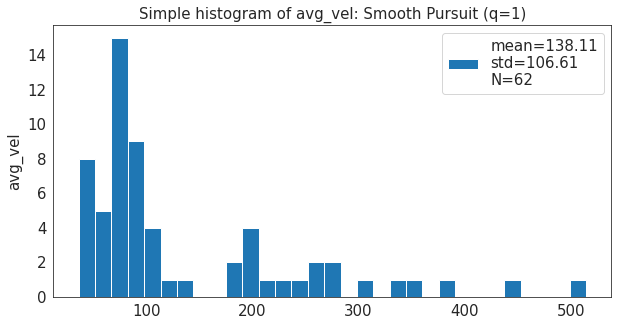

In [27]:
feature_histogram(seq, feat='avg_vel', event='smp')

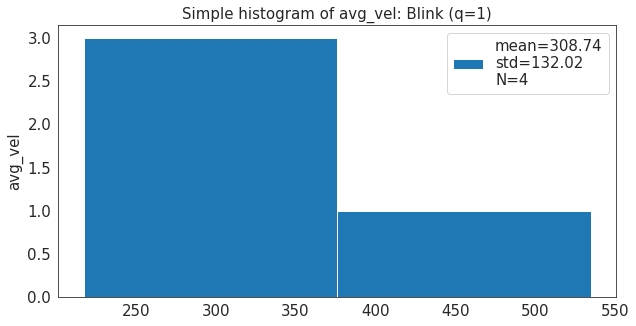

In [28]:
feature_histogram(seq, feat='avg_vel', event='blink')

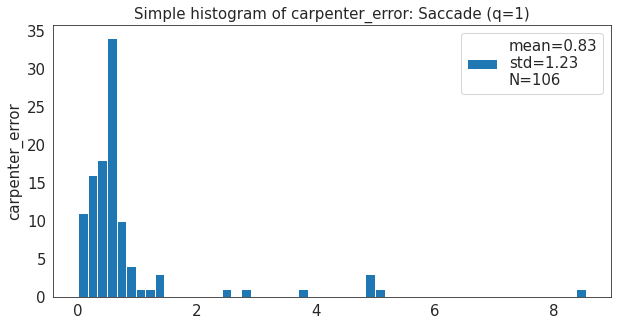

In [29]:
feature_histogram(seq, feat='carpenter_error', event='sac')

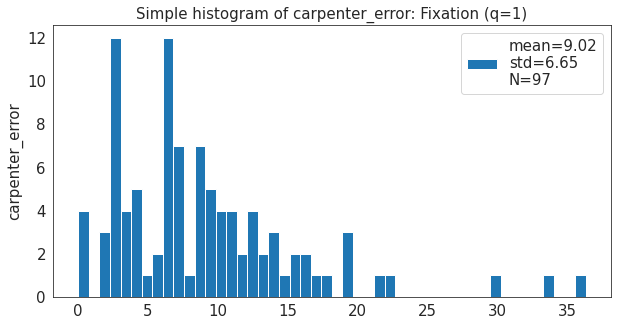

In [30]:
feature_histogram(seq, feat='carpenter_error', event='fix')

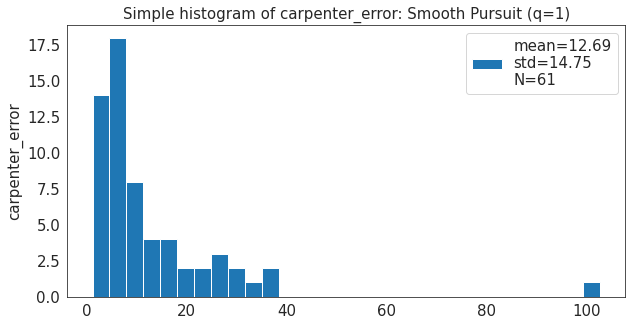

In [31]:
feature_histogram(seq, feat='carpenter_error', event='smp')

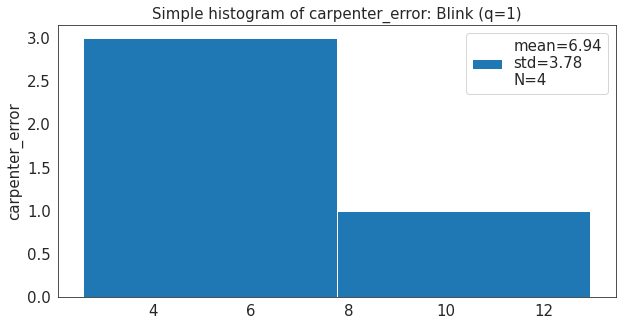

In [32]:
feature_histogram(seq, feat='carpenter_error', event='blink')

In [33]:
# Here, iss is the intersample velocity

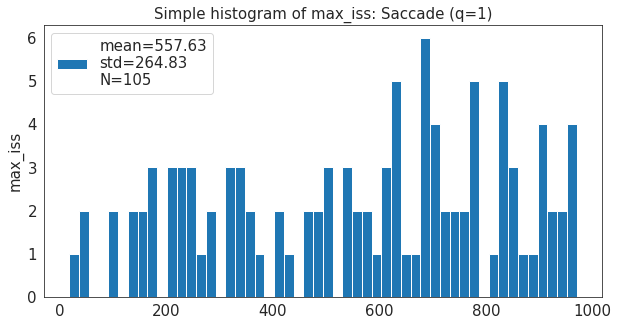

In [34]:
feature_histogram(seq, feat='max_iss', event='sac')

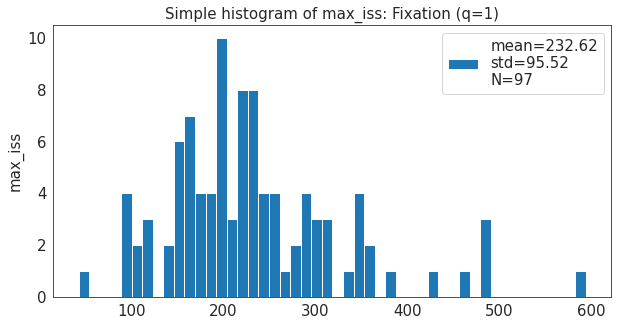

In [35]:
feature_histogram(seq, feat='max_iss', event='fix')

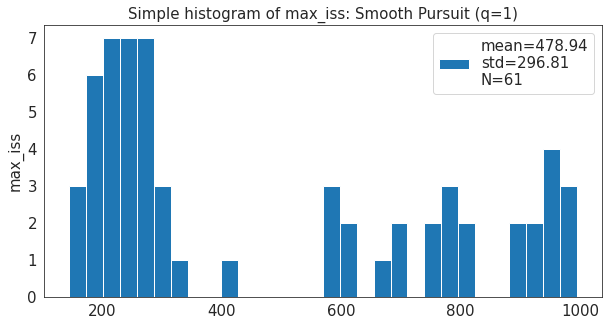

In [36]:
feature_histogram(seq, feat='max_iss', event='smp')

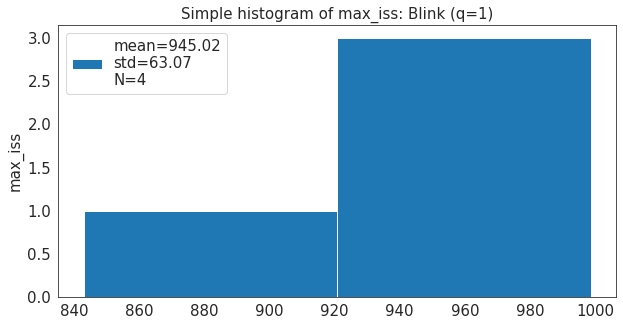

In [37]:
feature_histogram(seq, feat='max_iss', event='blink')

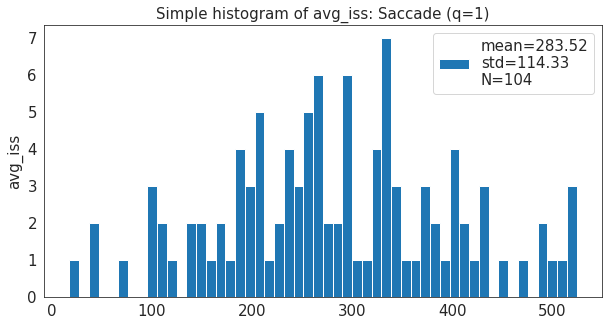

In [38]:
feature_histogram(seq, feat='avg_iss', event='sac')

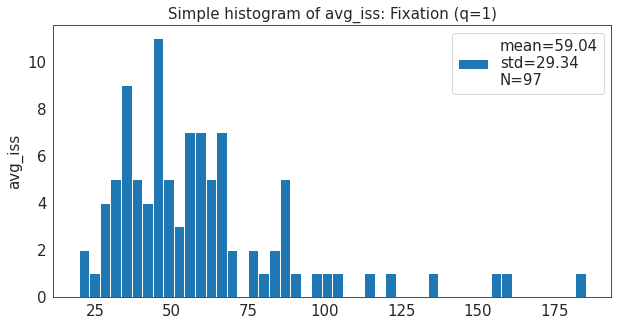

In [39]:
feature_histogram(seq, feat='avg_iss', event='fix')

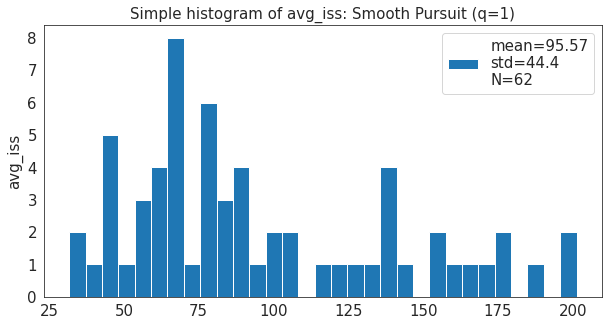

In [40]:
feature_histogram(seq, feat='avg_iss', event='smp')

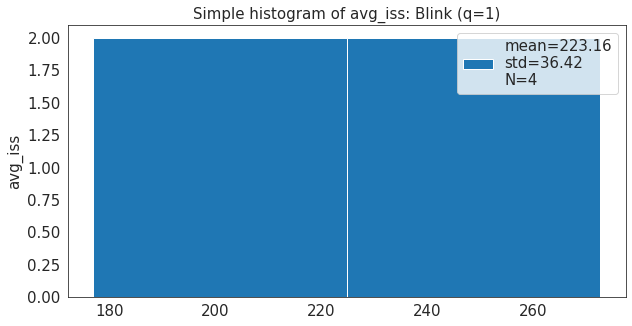

In [41]:
feature_histogram(seq, feat='avg_iss', event='blink')

In [42]:
# Here, Dn is the derivative of the interpolated positional features at time t: Dn = sqrt(x'(t)^2+y'(t)^2)

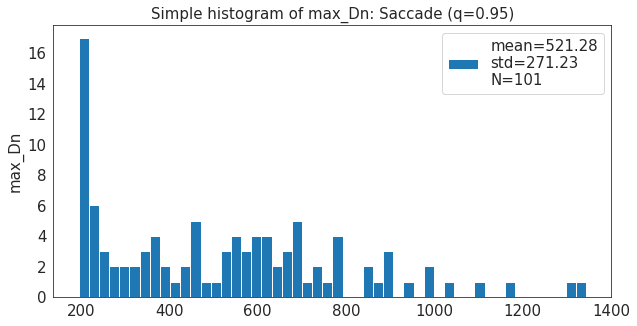

In [54]:
feature_histogram(seq, feat='max_Dn', event='sac',q=.95)

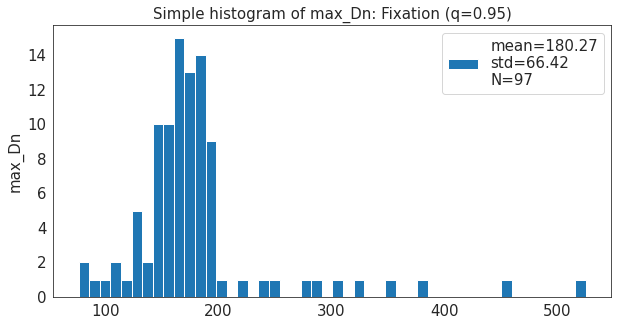

In [55]:
feature_histogram(seq, feat='max_Dn', event='fix',q=.95)

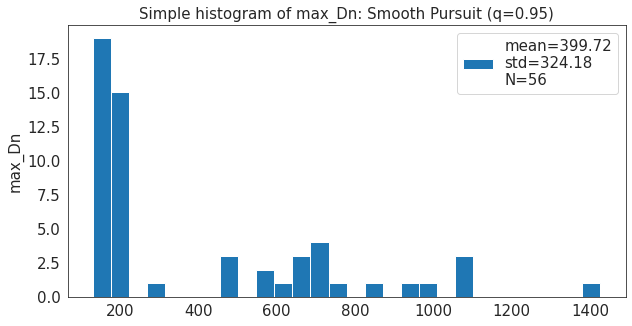

In [56]:
feature_histogram(seq, feat='max_Dn', event='smp',q=.95)

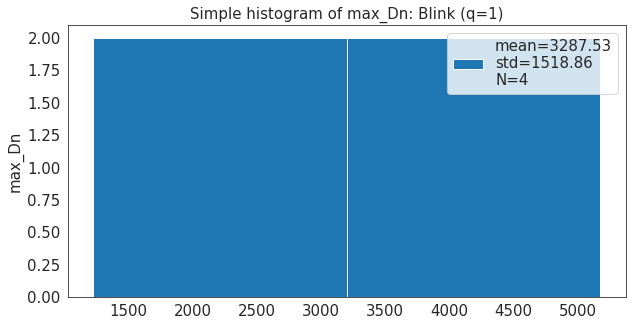

In [57]:
feature_histogram(seq, feat='max_Dn', event='blink')

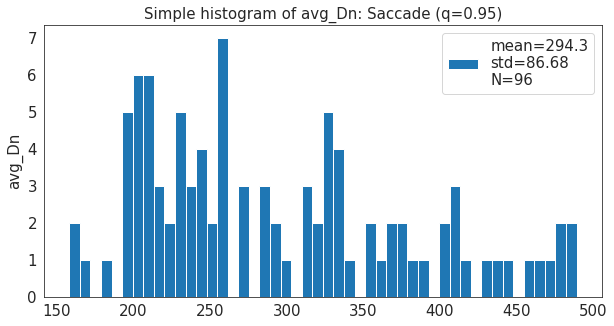

In [65]:
feature_histogram(seq, feat='avg_Dn', event='sac',q=.95)

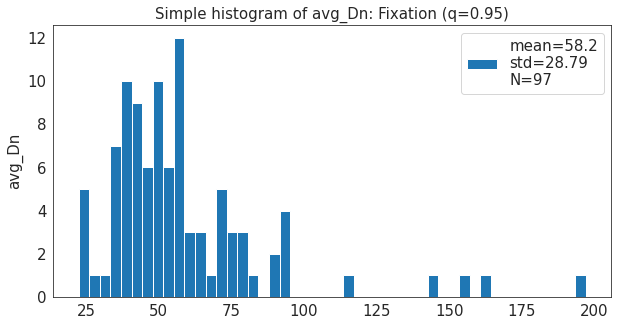

In [66]:
feature_histogram(seq, feat='avg_Dn', event='fix',q=.95)

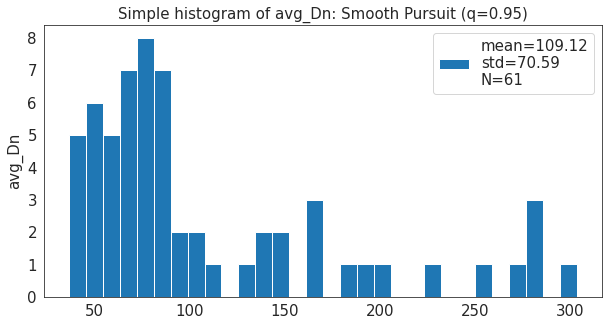

In [67]:
feature_histogram(seq, feat='avg_Dn', event='smp',q=.95)

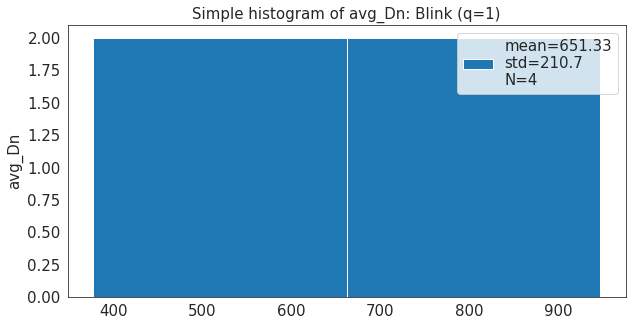

In [68]:
feature_histogram(seq, feat='avg_Dn', event='blink')

In [69]:
for e in ['sac', 'fix', 'smp', 'blink']:
    print(e)
    print(seq.loc[seq.event==e,['duration','amplitude','avg_vel','max_vel','carpenter_error']].describe())
    print('\n')

sac
         duration   amplitude     avg_vel     max_vel  carpenter_error
count  106.000000  106.000000  106.000000  106.000000       106.000000
mean     0.044213    6.680873  304.917417  305.333608         0.826102
std      0.068664    7.639698  117.136561  116.684729         1.239844
min      0.004997    0.331059  157.342335  195.362636         0.013418
25%      0.010003    1.651465  212.783403  212.783403         0.321919
50%      0.025010    3.934315  264.121219  264.121219         0.570373
75%      0.045006    8.524299  344.089675  344.089675         0.656486
max      0.430151   51.873070  720.727735  720.727735         8.535332


fix
        duration  amplitude     avg_vel      max_vel  carpenter_error
count  97.000000  97.000000   97.000000    97.000000        97.000000
mean    0.259885   2.130783   85.389495   378.499713         9.015610
std     0.197695   2.482514   82.669484   526.207733         6.689053
min     0.015005   0.027779   22.260853   107.696086         0.024207
2

In [70]:
# Show Carpenter error statistics
seq.groupby('event').carpenter_error.describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
blink,4.0,6.935991,4.368967,2.555980,4.892158,6.112181,8.156014,12.963621
fix,97.0,9.015610,6.689053,0.024207,4.156339,7.475576,11.816891,36.290938
noise,1.0,8.857989,NaN,8.857989,8.857989,8.857989,8.857989,8.857989
sac,106.0,0.826102,1.239844,0.013418,0.321919,0.570373,0.656486,8.535332
smp,62.0,14.448775,20.220686,1.203431,4.947701,7.939869,15.718433,121.561745


In [71]:
print('Saccades under 1 deg')
print(np.round(len(seq.loc[(seq.event=='sac')&(seq.amplitude<1)])/len(seq[seq.event=='sac'])*100,2),'%')

print('\nSmooth Pursuit under 1 deg')
print(np.round(len(seq.loc[(seq.event=='smp')&(seq.amplitude<1)])/len(seq[seq.event=='smp'])*100,2),'%')


Saccades under 1 deg
10.38 %

Smooth Pursuit under 1 deg
4.84 %
